# Heart Disease Prediction – Exploratory Data Analysis (EDA)

## Objective
The goal of this notebook is to perform Exploratory Data Analysis (EDA) on the
Heart Disease UCI dataset to understand:
- Data distribution
- Feature relationships
- Class balance
- Potential preprocessing requirements

This analysis supports informed model selection and feature engineering
decisions as part of an end-to-end MLOps pipeline.

In [9]:
# Import core data analysis and visualization libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# Set visualization style for consistency
sns.axes_style(style="whitegrid")

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

In [10]:
# Check if dataset exists, download if not available
data_dir = Path("../data")
data_file = data_dir / "heart.csv"

# Create data directory if it doesn't exist
data_dir.mkdir(parents=True, exist_ok=True)

if not data_file.exists():
    print("Dataset not found. Downloading from Kaggle...")
    
    # Install kagglehub if needed (uncomment if required)
    # !pip install kagglehub[pandas-datasets]
    
    import kagglehub
    from kagglehub import KaggleDatasetAdapter
    
    # Download the dataset using kagglehub
    df = kagglehub.load_dataset(
        KaggleDatasetAdapter.PANDAS,
        "johnsmith88/heart-disease-dataset",
        "heart.csv",
    )
    
    # Save to data directory
    df.to_csv(data_file, index=False)
    print(f"Dataset downloaded and saved to {data_file}")
    print(f"First 5 records:\n{df.head()}")
else:
    print(f"Dataset already exists at {data_file}")

Dataset not found. Downloading from Kaggle...


c:\Users\Jeet1\miniconda3\envs\bits-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Jeet1\AppData\Local\Temp\ipykernel_12916\3707626878.py:18: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 37.2k/37.2k [00:00<00:00, 138kB/s]

Dataset downloaded and saved to ..\data\heart.csv
First 5 records:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [11]:
# Load the heart disease dataset from the data directory
data_path = "../data/heart.csv"
df = pd.read_csv(data_path)

# Display first few rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Dataset Overview

This dataset contains patient health indicators such as:
- Age
- Sex
- Chest pain type
- Blood pressure
- Cholesterol levels

The target variable `target` indicates:
- `1` → Presence of heart disease
- `0` → Absence of heart disease

In [12]:
# Dataset dimensions
print("Dataset Shape:", df.shape)

# Data types and missing values
df.info()

Dataset Shape: (1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Data Quality Check

We inspect the dataset for:
- Missing values
- Inconsistent data types
- Potential preprocessing needs

In [13]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Target Variable Distribution

Understanding class balance is critical for:
- Model evaluation
- Metric selection
- Bias detection


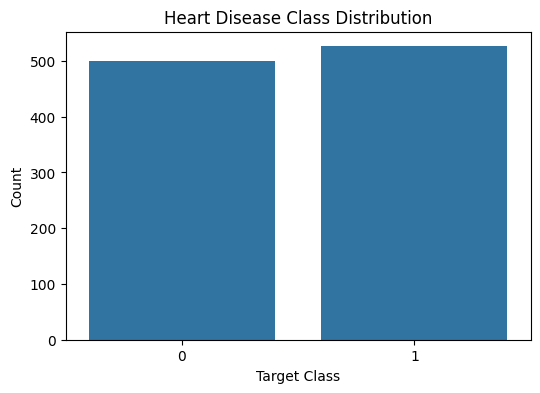

In [14]:
# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x="target", data=df)
plt.title("Heart Disease Class Distribution")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()

## Distribution of Numerical Features

Histograms help understand:
- Feature spread
- Skewness
- Outliers

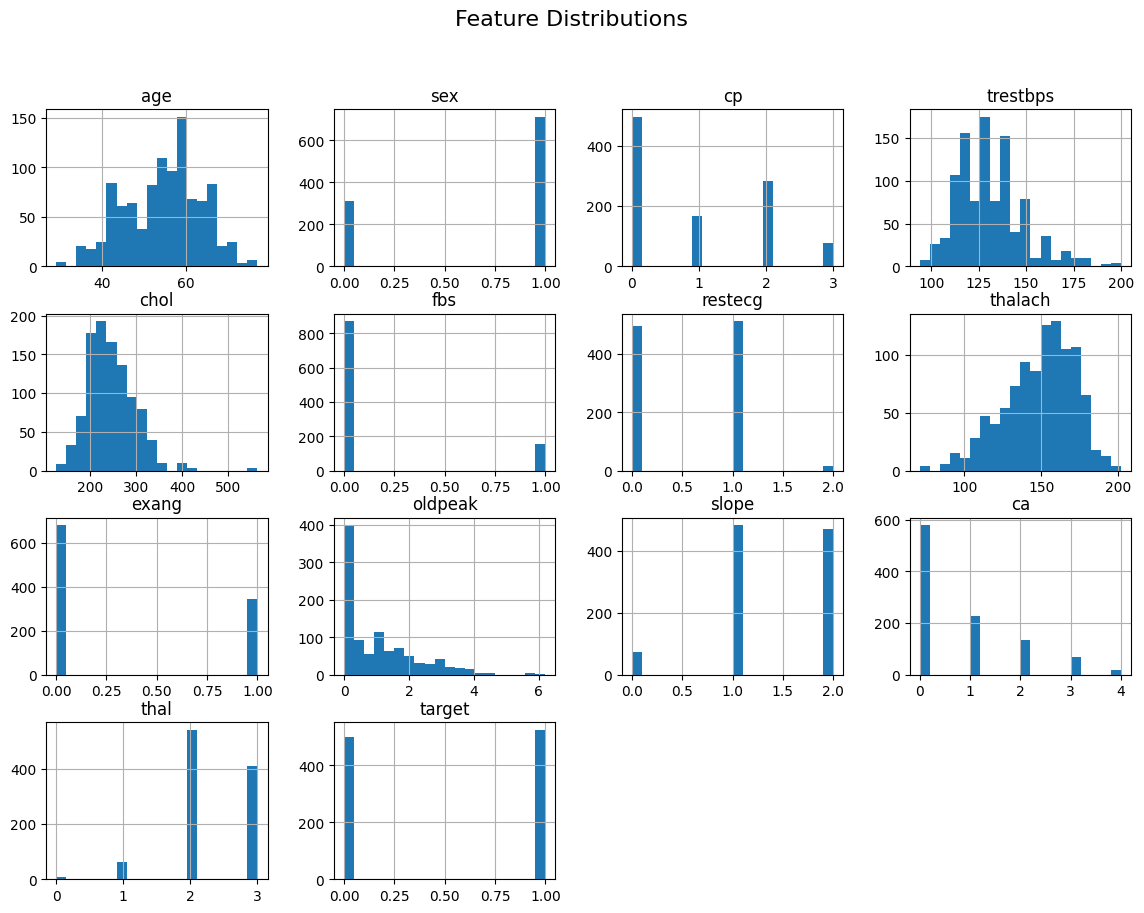

In [15]:
# Plot histograms for numerical features
df.hist(figsize=(14,10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

## Correlation Analysis

Correlation analysis helps identify:
- Strongly related features
- Redundant variables
- Potential multicollinearity

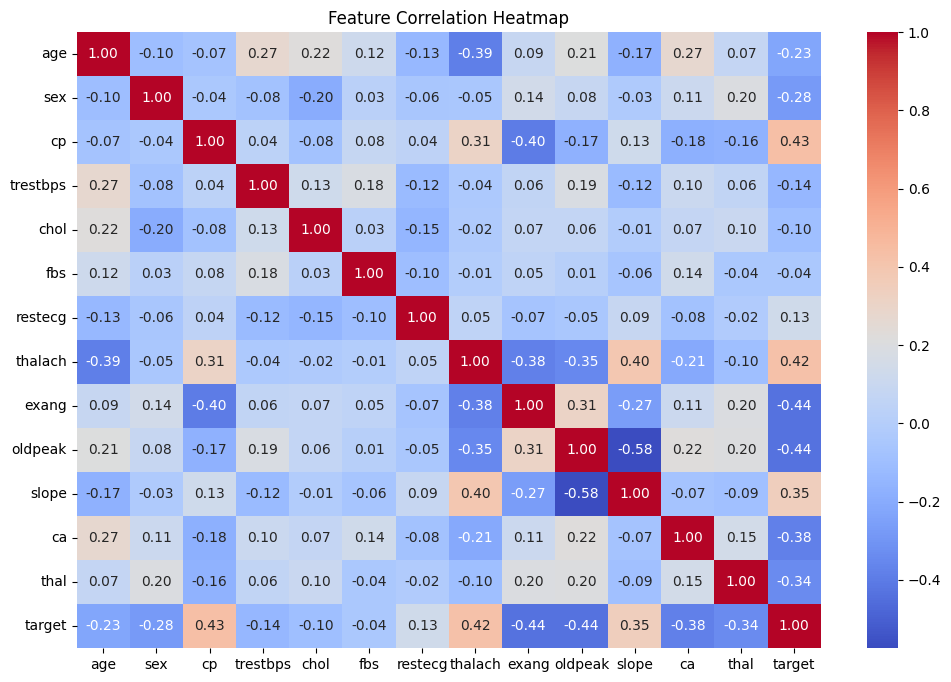

In [16]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## Key EDA Insights

- The dataset is clean with no missing values.
- The target variable shows moderate class balance.
- Certain features (age, cholesterol, chest pain type) show
  noticeable correlation with heart disease.
- Feature scaling is required due to varying feature ranges.

These insights guide preprocessing, model selection,
and evaluation strategies in later stages of the MLOps pipeline.